0. Import bibliotek

In [7]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Wyświetlenie listy id produktów, o których zostały pobrane opinie

In [8]:
print(*[file.split(".")[0] for file in os.listdir("opinions")], sep="\n")

151210226



2. Wczytanie kodu produktu, o którym mają zostać przeanalizowane opinie

In [9]:
product_id = input("Podaj kod produktu: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)

3. Podstawowe statystyki

In [10]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars

4.424242424242424

4. Histogram częstości ocen w opiniach

[Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '23')]

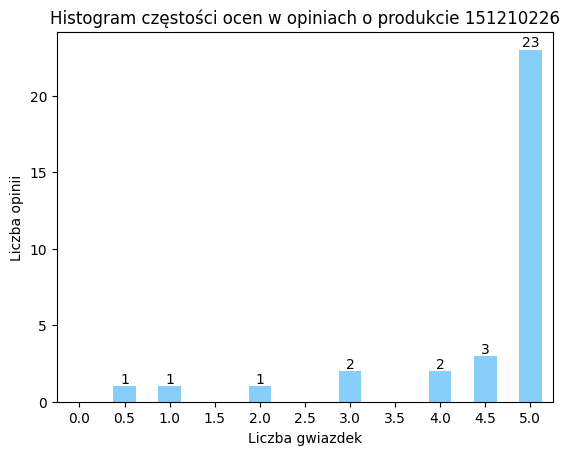

In [11]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5))
ax = stars_distribution.plot.bar(color = "lightskyblue")
ax.set_title(f"Histogram częstości ocen w opiniach o produkcie {product_id}")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opinii")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else '')

5. Wykres udziału rekomendacji w opiniach

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 151210226')

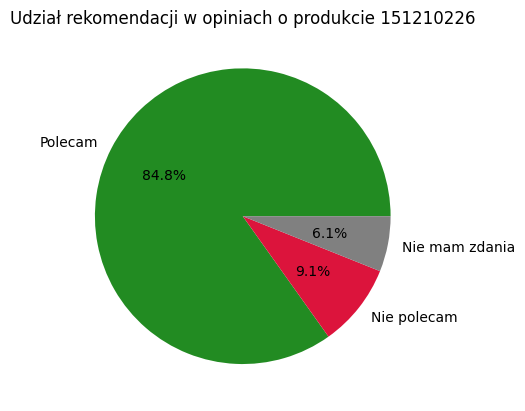

In [12]:
recommendations_distribution = opinions.recommend.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendations_distribution.plot.pie(
    autopct = lambda p: f'{p:.1f}%' if p > 0 else '',
    label = "",
    colors = ['forestgreen', 'crimson', 'gray'],
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"]
)
plt.title(f"Udział rekomendacji w opiniach o produkcie {product_id}")